In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\sanja\Desktop\python training\assignment\capston walmart\Walmart DataSet.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [5]:
# All columns are numaric

In [6]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### There is no null values in the data frame

In [7]:
data.duplicated().sum()

0

#### There is no duplicate row in the dataframe

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [9]:
columns = data.columns
columns = columns.tolist()
columns.remove("Store")
columns.remove("Holiday_Flag")
columns

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [10]:
# Removed Store as it is just a id and Holiday_Flag is a binary column so outlier detection is not needed.

Outliers for Weekly_Sales: 
Date
2010-12-24    3436007.68
2011-12-23    3224369.80
2010-11-26    2789469.45
2010-12-17    2740057.14
2010-12-24    3526713.39
2011-11-25    3004702.33
2011-12-16    2771397.17
2011-12-23    3676388.98
2010-12-24    2727575.18
2010-11-26    2939946.38
2010-12-17    2811646.85
2010-12-24    3749057.69
2011-11-25    2950198.64
2011-12-23    3487986.89
2010-11-26    2766400.05
2010-12-17    2771646.81
2010-12-24    3595903.20
2011-11-25    2864170.61
2011-12-16    2760346.71
2011-12-23    3556766.03
2010-11-26    2921709.71
2010-12-17    2762861.41
2010-12-24    3818686.45
2011-12-23    3369068.99
2010-11-26    2811634.04
2010-12-10    2752122.08
2010-12-17    2819193.17
2010-12-24    3766687.43
2011-11-25    2906233.25
2011-12-16    2762816.65
2011-12-23    3555371.03
2010-12-24    2734277.10
2010-12-24    3078162.08
2011-12-23    2739019.75
Name: Weekly_Sales, dtype: float64


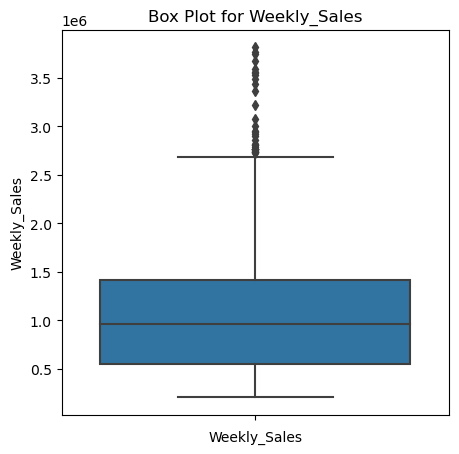

Outliers for Temperature: 
Date
2011-02-04   -2.06
2011-01-07    6.23
2011-01-28    5.54
Name: Temperature, dtype: float64


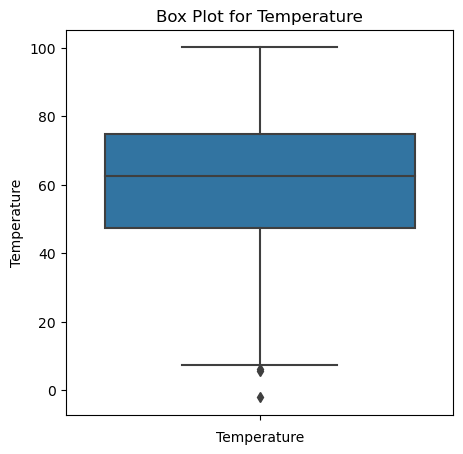

Outliers for Fuel_Price: 
Series([], Name: Fuel_Price, dtype: float64)


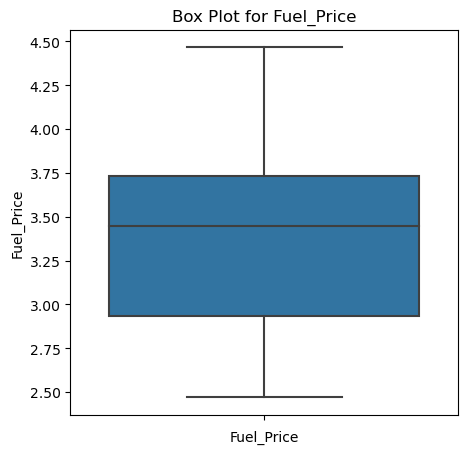

Outliers for CPI: 
Series([], Name: CPI, dtype: float64)


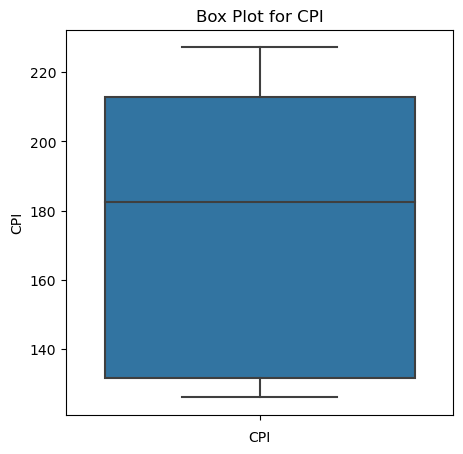

Outliers for Unemployment: 
Date
2012-07-06    4.077
2012-07-13    4.077
2012-07-20    4.077
2012-07-27    4.077
2012-08-03    4.077
              ...  
2012-09-28    4.156
2012-10-05    4.145
2012-10-12    4.145
2012-10-19    4.145
2012-10-26    4.145
Name: Unemployment, Length: 481, dtype: float64


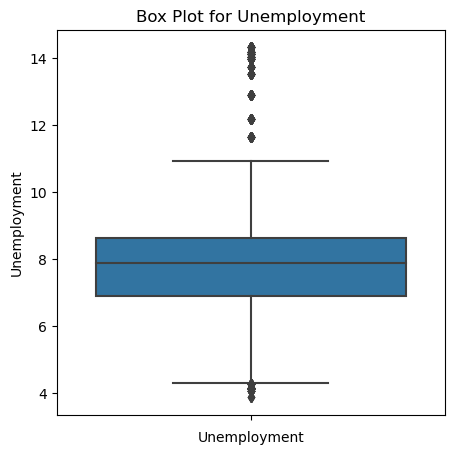

In [11]:
for col in columns:
    colData = data[col]
    
    Q1 = colData.quantile(0.25)
    Q3 = colData.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = colData[(colData < lower_bound) | (colData > upper_bound)]
    print("Outliers for {}: ".format(col))
    print(outliers)
    
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=colData)
    plt.xlabel(col)
    plt.title(f'Box Plot for {col}')
    plt.show()

#### Weekly_Sales have outliers above the upper limit 
#### Temperature does not have outliers
#### Fuel_Price does not have outliers
#### Unemployment have outliers on both upper and lower limit

In [12]:
store_dict = {}
storeIds = data["Store"].unique()

for storeId in storeIds:
    store_dict[storeId] = data[data["Store"] == storeId]

In [13]:
store_dict[1]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573


In [14]:
# DataFrame for Unemployment vs Weekly_Sales correlation
unemploymentVsWeeklySales = pd.DataFrame(columns=["Store", "Weekly_Sales"])
for i in range(1,46):
    store = data[data.Store == i]
    correlations = store.groupby('Store')[['Unemployment','Weekly_Sales']].corr().iloc[0::2, -1].reset_index()
    correlations.drop(columns=["level_1"], inplace=True)
    unemploymentVsWeeklySales = pd.concat([unemploymentVsWeeklySales,correlations])
(unemploymentVsWeeklySales.rename(columns={"Weekly_Sales": "Unemployment_Vs_Weekly_Sales_Corr"}, inplace=True))
print(unemploymentVsWeeklySales)
maxWeeklySalesCorr = unemploymentVsWeeklySales['Unemployment_Vs_Weekly_Sales_Corr'].max() 
minWeeklySalesCorr = unemploymentVsWeeklySales['Unemployment_Vs_Weekly_Sales_Corr'].min() 
print("Most affected Store Data")
print(unemploymentVsWeeklySales[unemploymentVsWeeklySales['Unemployment_Vs_Weekly_Sales_Corr'] == maxWeeklySalesCorr])
print(unemploymentVsWeeklySales[unemploymentVsWeeklySales['Unemployment_Vs_Weekly_Sales_Corr'] == minWeeklySalesCorr])

  Store  Unemployment_Vs_Weekly_Sales_Corr
0     1                          -0.097955
0     2                           0.066325
0     3                          -0.230413
0     4                          -0.337015
0     5                          -0.207043
0     6                           0.044251
0     7                          -0.165382
0     8                          -0.052580
0     9                          -0.191534
0    10                           0.131908
0    11                          -0.020339
0    12                          -0.009286
0    13                          -0.171633
0    14                           0.210786
0    15                           0.078905
0    16                          -0.070864
0    17                          -0.263600
0    18                           0.139179
0    19                           0.101464
0    20                          -0.095341
0    21                           0.218367
0    22                           0.039043
0    23    

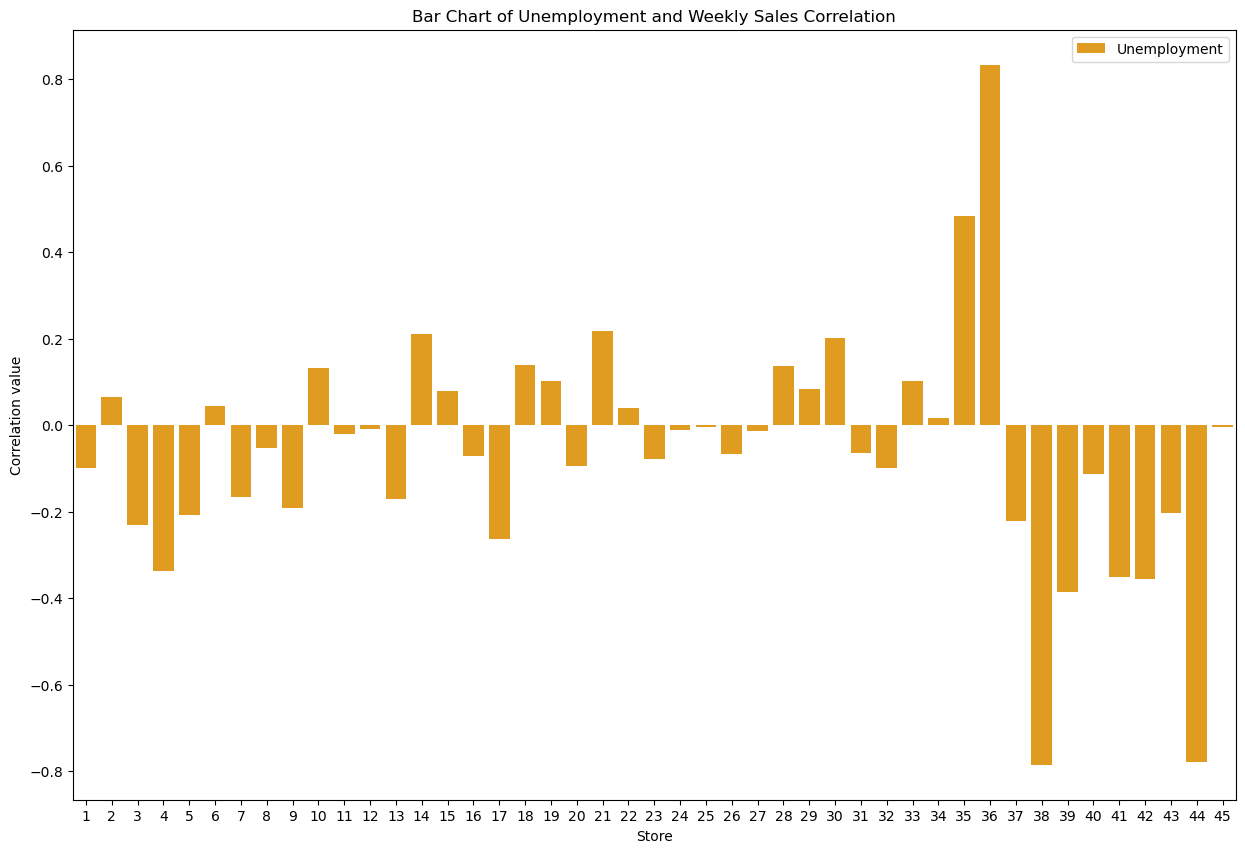

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Store", y='Unemployment_Vs_Weekly_Sales_Corr', data=unemploymentVsWeeklySales, color='orange', label='Unemployment')

plt.xlabel('Store')
plt.ylabel('Correlation value')
plt.title('Bar Chart of Unemployment and Weekly Sales Correlation')

plt.legend()

plt.show()

#### 1. From the above value we can say the Store no 36 is most affected by unemployment as it has the highest correlation with Weekly_sales
#### 2. Store no 36 have positive correlation with unemployement which means as unemployment increase weekly sales increases.
#### 3. Some of the store have very low correlation between Unemployment and Weekly_Sales which indicated negligible affect on Weekly_Sales.  
#### 4. Store no 38 and 44 is also highly affected by unemployment and they have negative correlation which means as unemplyment increases weekly sales decreases

In [16]:
columns = data.columns
columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

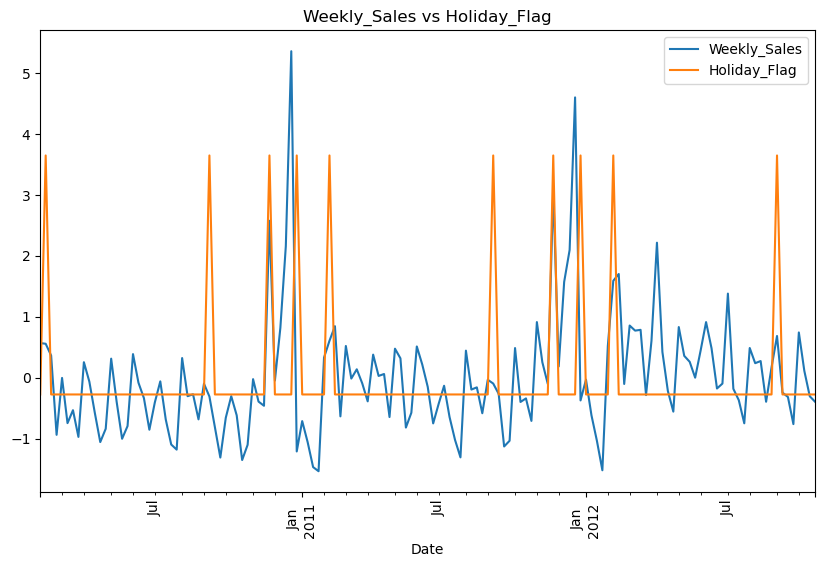

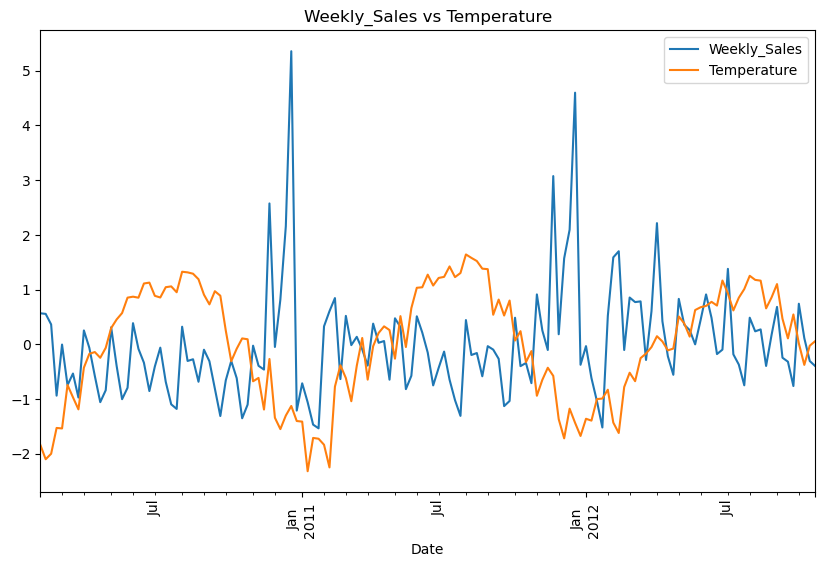

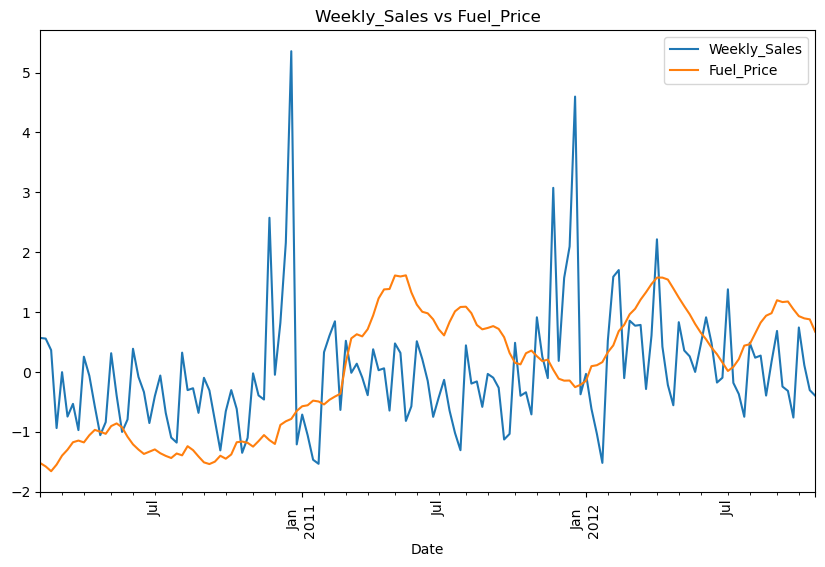

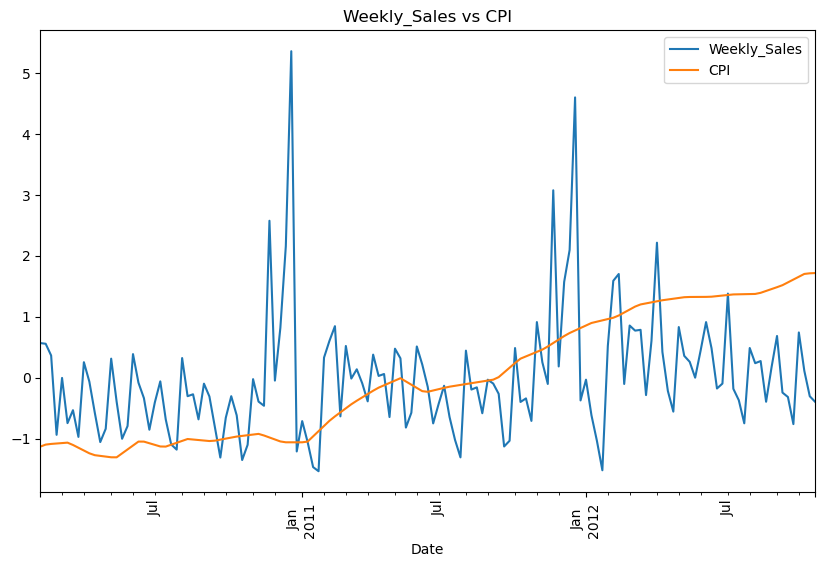

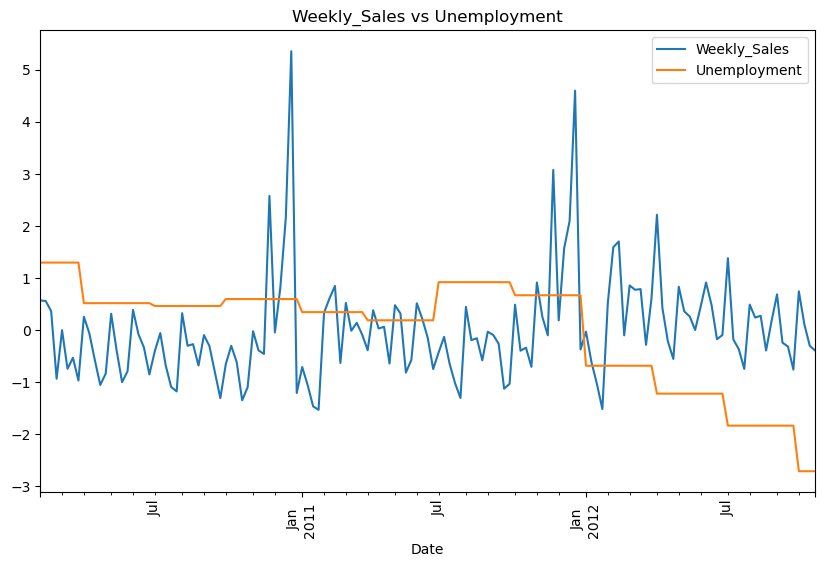

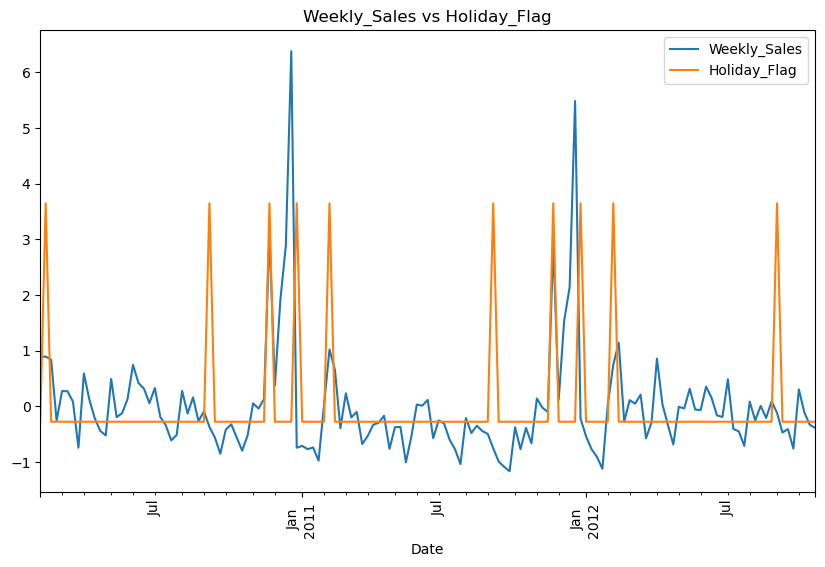

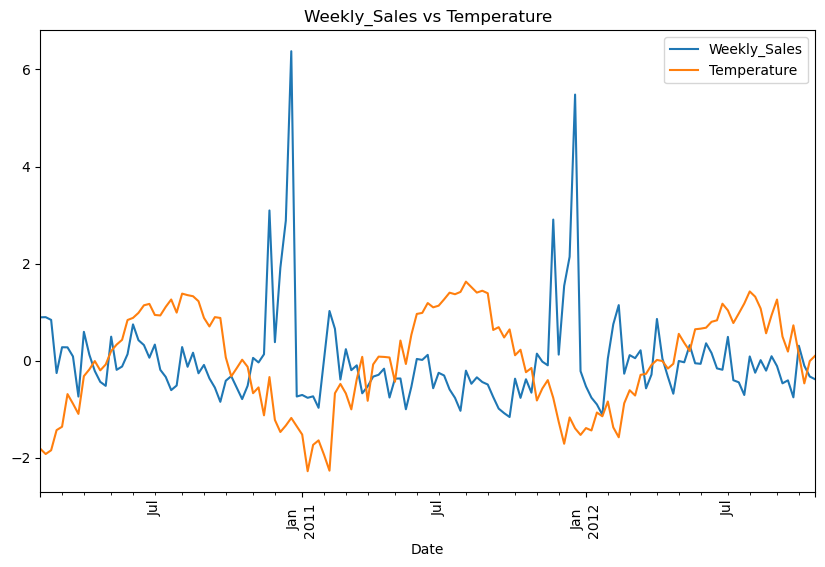

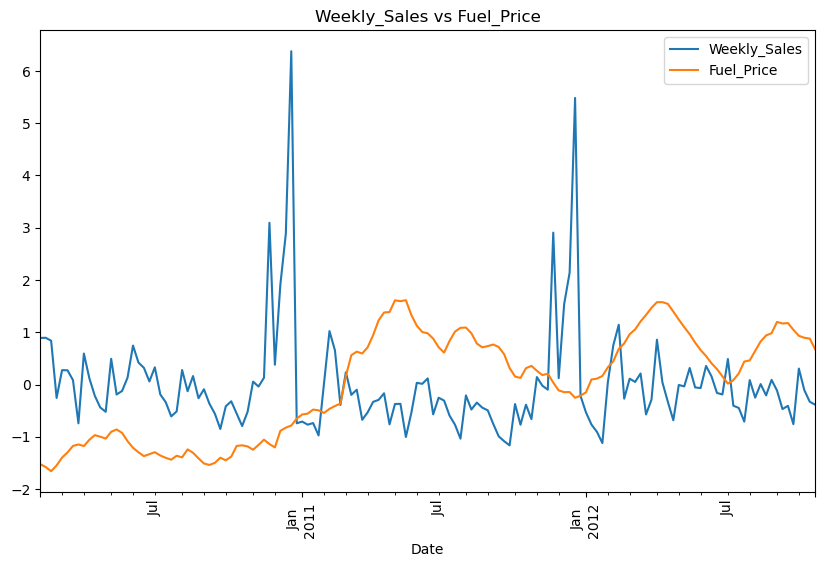

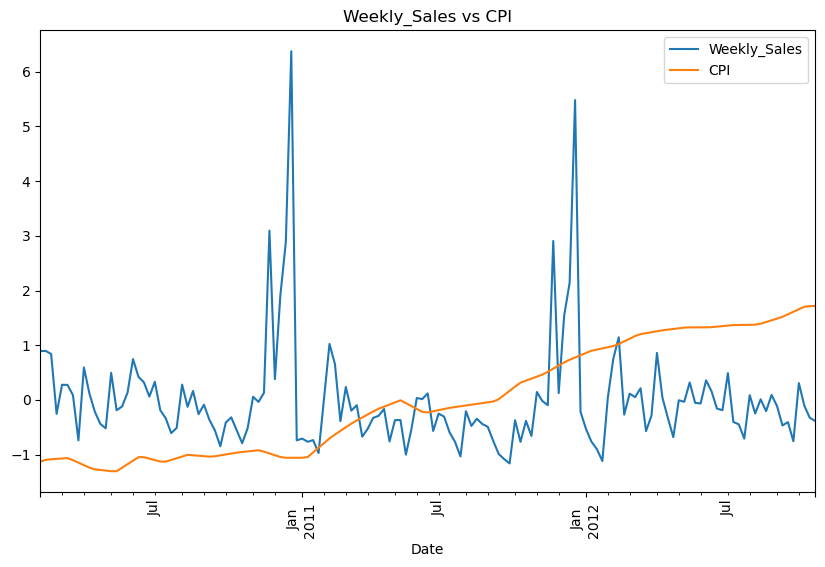

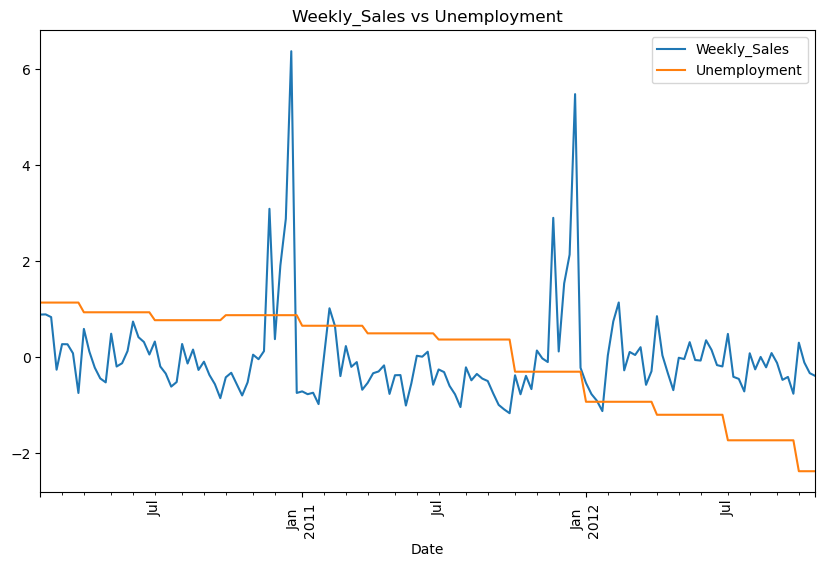

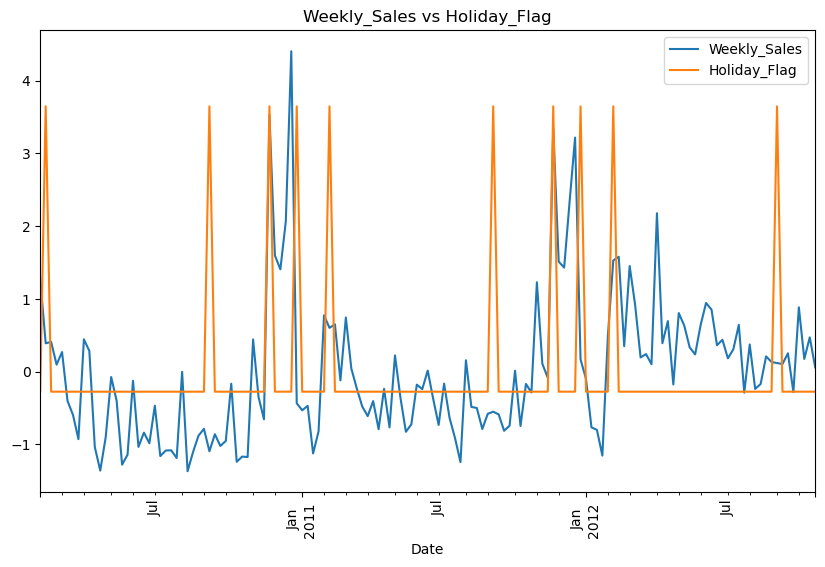

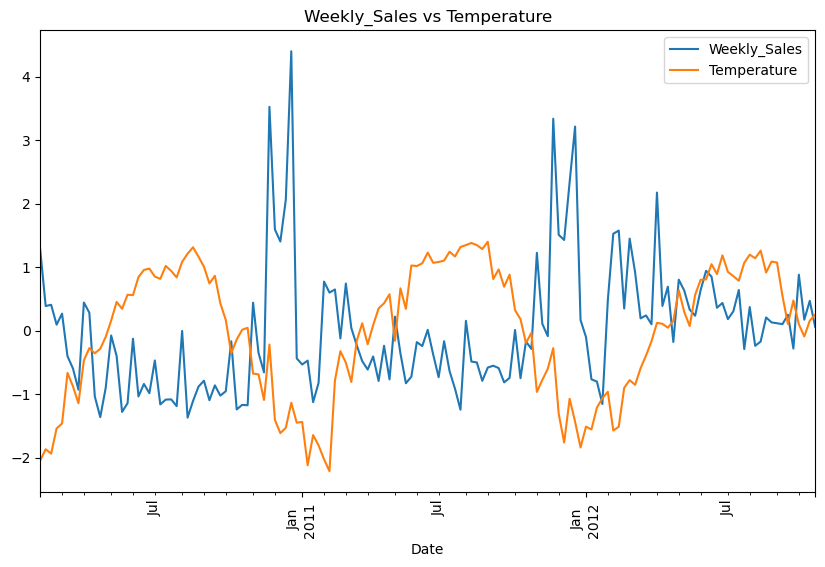

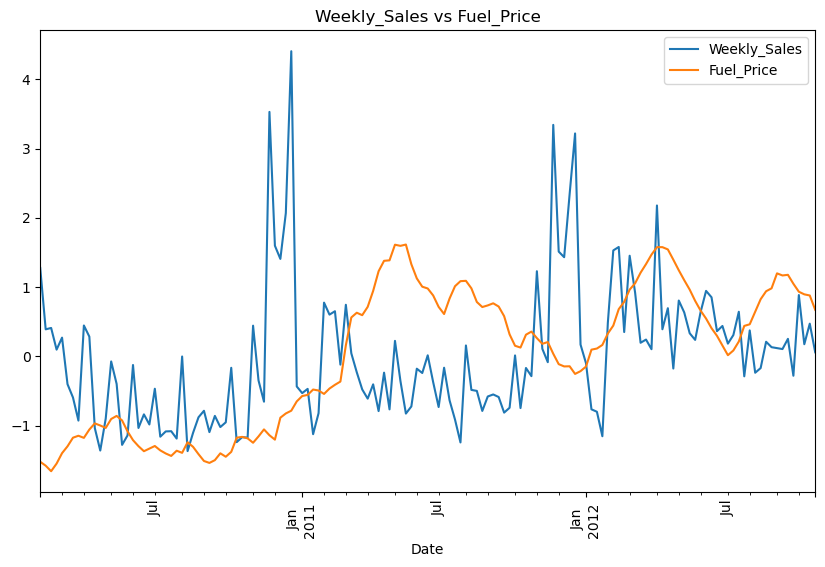

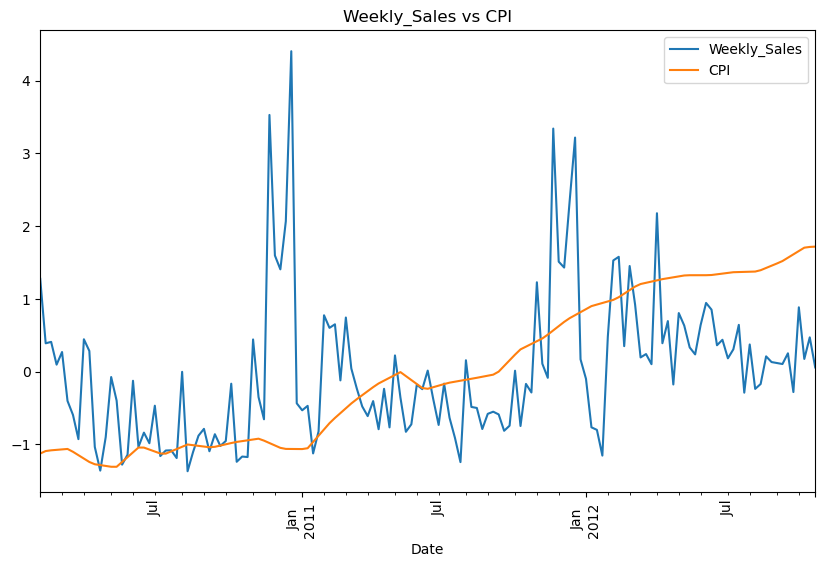

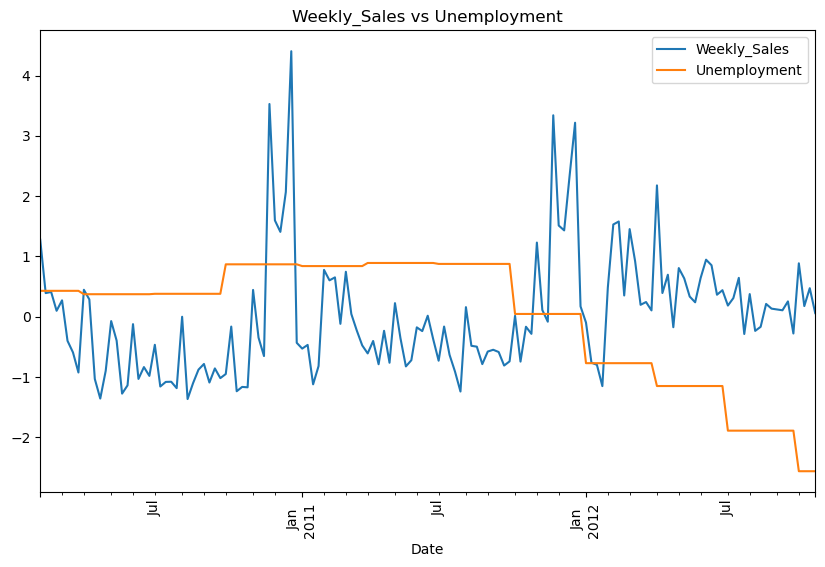

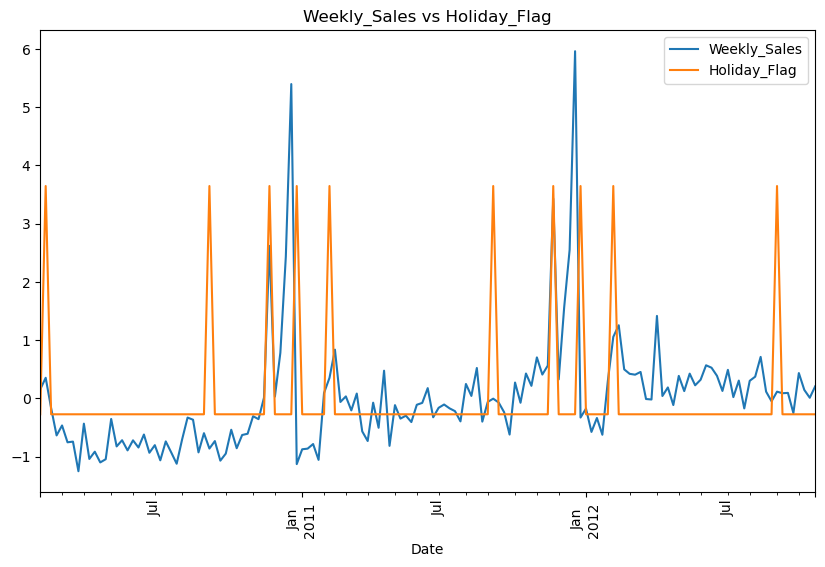

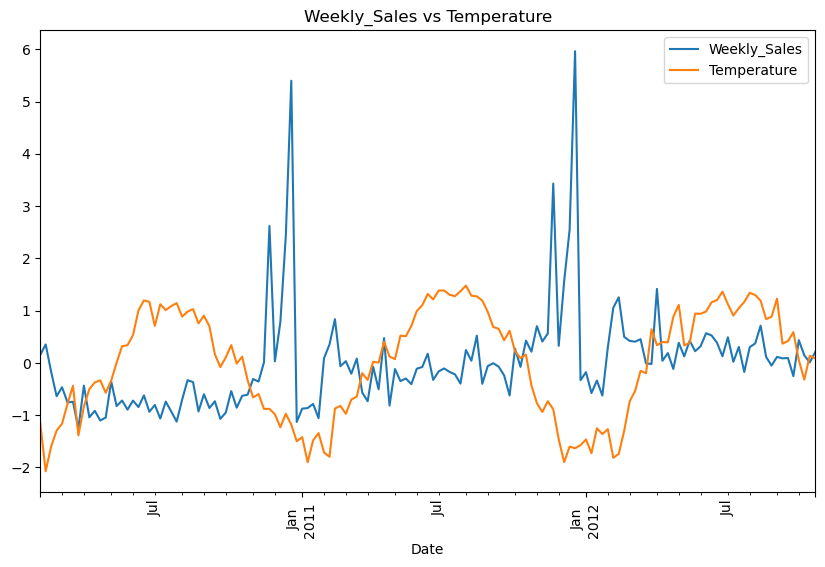

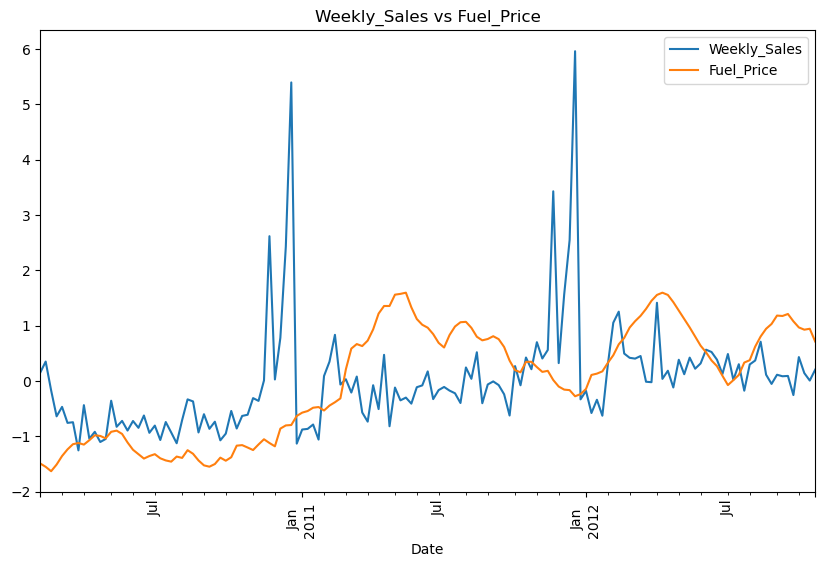

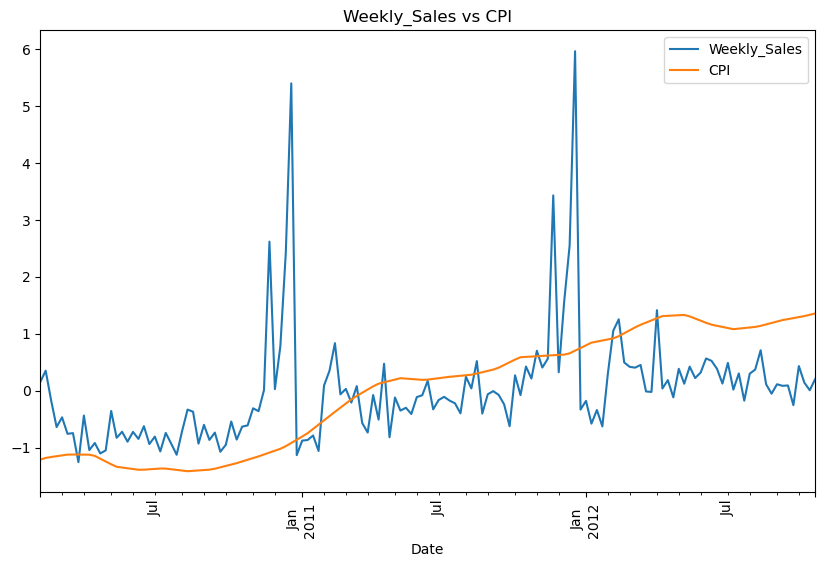

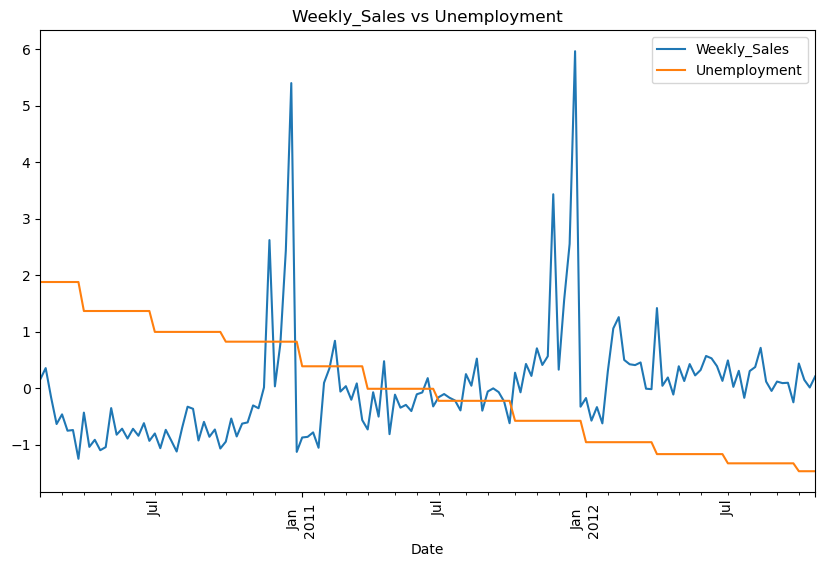

In [18]:
# Drawing graph of other columns vs the Weekly_Sales
# add the limit according to need 
limit = 5
for i in range(1,limit):
    single_store = store_dict[i]
    single_store_scaled = pd.DataFrame(scaler.fit_transform(single_store), columns=single_store.columns)
    single_store_scaled.set_index(single_store.index, inplace=True)
    for col in columns:
        if col not in ['Weekly_Sales', 'Store']:
            weekly_sales_vs_cols = single_store_scaled[['Weekly_Sales',col]]
            fig, ax = plt.subplots(figsize=(10, 6))
            plot = weekly_sales_vs_cols.plot(rot=90, ax=ax)
            plot.set_title("Weekly_Sales vs {}".format(col))
            plt.show()
            plt.close()

### By reviewing the plots above We can conclude the below insights for Weekly_Sales seasonal trend:
#### 1. During holiday times, there is an seasonal increase in weekly sales.
#### 2. As temperature decrease there is a seasonal increase of Weekly sales.
#### 3. Fule price, CPI, Unemployment does not have effect on seasonal trand of Weekly sales.

In [19]:
# DataFrame for Consumer Price index vs Weekly_Sales correlation
CPIVsWeeklySales = pd.DataFrame(columns=["Store", "Weekly_Sales"])
for i in range(1,46):
    store = data[data.Store == i]
    correlations = store.groupby('Store')[['CPI','Weekly_Sales']].corr().iloc[0::2, -1].reset_index()
    correlations.drop(columns=["level_1"], inplace=True)
    CPIVsWeeklySales = pd.concat([CPIVsWeeklySales,correlations])
(CPIVsWeeklySales.rename(columns={"Weekly_Sales": "CPI_Vs_Weekly_Sales_Corr"}, inplace=True))
print(CPIVsWeeklySales)
maxWeeklySalesCorr = CPIVsWeeklySales['CPI_Vs_Weekly_Sales_Corr'].max() 
minWeeklySalesCorr = CPIVsWeeklySales['CPI_Vs_Weekly_Sales_Corr'].min() 
print("Most affected Store Data")
print(CPIVsWeeklySales[CPIVsWeeklySales['CPI_Vs_Weekly_Sales_Corr'] == maxWeeklySalesCorr])
print(CPIVsWeeklySales[CPIVsWeeklySales['CPI_Vs_Weekly_Sales_Corr'] == minWeeklySalesCorr])

  Store  CPI_Vs_Weekly_Sales_Corr
0     1                  0.225408
0     2                 -0.062431
0     3                  0.317250
0     4                  0.351157
0     5                  0.308261
0     6                 -0.011357
0     7                  0.289044
0     8                  0.120255
0     9                  0.294805
0    10                 -0.115374
0    11                  0.069781
0    12                  0.084087
0    13                  0.163976
0    14                 -0.419755
0    15                 -0.174467
0    16                  0.124285
0    17                  0.348571
0    18                 -0.193541
0    19                 -0.155341
0    20                  0.058706
0    21                 -0.163649
0    22                 -0.038602
0    23                  0.084248
0    24                 -0.013684
0    25                 -0.010914
0    26                  0.131980
0    27                 -0.213082
0    28                 -0.095908
0    29       

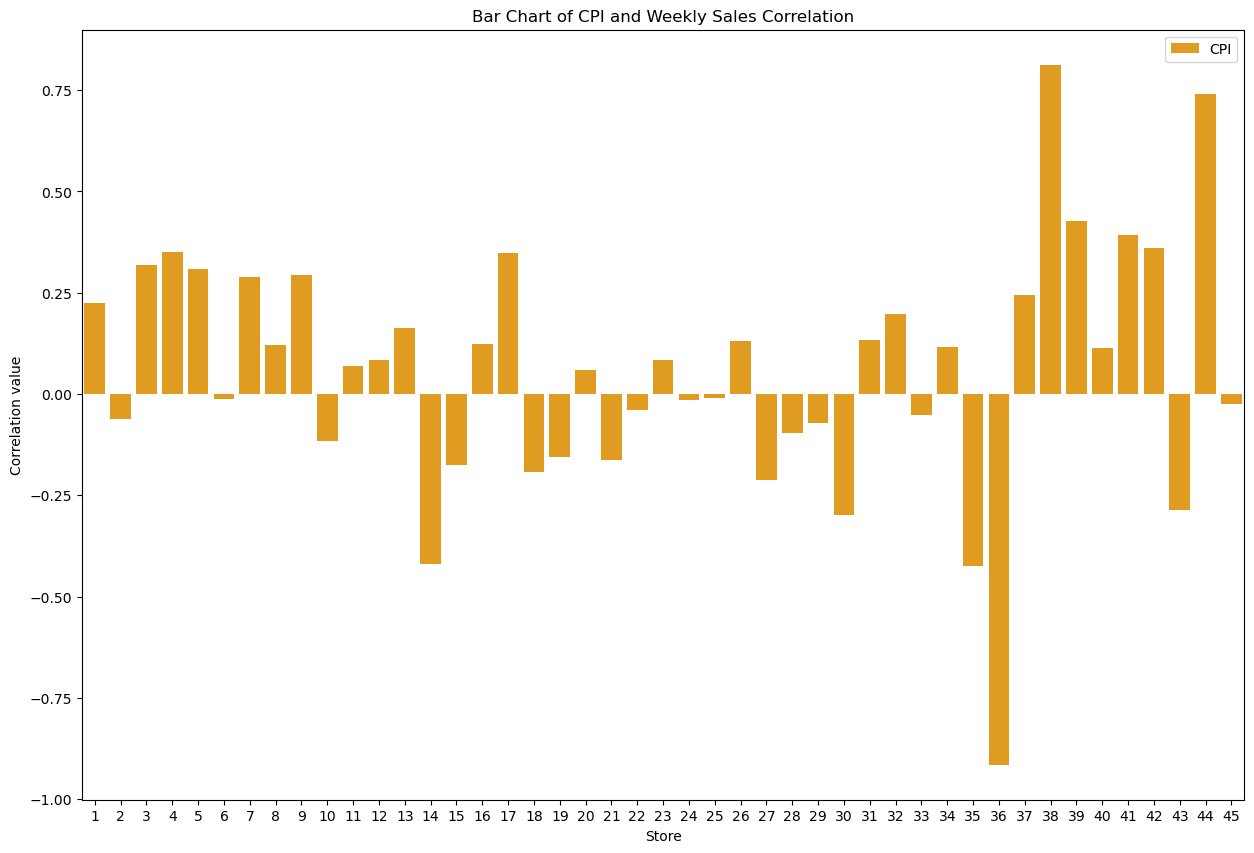

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Store", y='CPI_Vs_Weekly_Sales_Corr', data=CPIVsWeeklySales, color='orange', label='CPI')

plt.xlabel('Store')
plt.ylabel('Correlation value')
plt.title('Bar Chart of CPI and Weekly Sales Correlation')

plt.legend()

plt.show()

#### 1. From the above value we can say the Store no 36 is most affected by Consumer Price index as it has the highest correlation with Weekly_sales
#### 2. Store no 36 have negative correlation with Consumer Price index which means as Consumer Price index increase weekly sales decreases.
#### 3. Some of the store have very low correlation between Consumer Price index and Weekly_Sales which indicated negligible affect on Weekly_Sales.  
#### 4. Store no 38 and 44 is also highly affected by Consumer Price index and they have positive correlation which means as Consumer Price index increases weekly sales increases.
#### 5. Store no 6, 24, 25 is almost very little correlation with Consumer Price index that means Weekly Sales are not affected by Consumer Price index for those stores.

In [21]:
total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum()
average_sales_per_store = data.groupby('Store')['Weekly_Sales'].mean()

top_store_total = total_sales_per_store.idxmax()
top_store_avg = average_sales_per_store.idxmax()
worst_store_total = total_sales_per_store.idxmin()
worst_store_avg = average_sales_per_store.idxmin()

print(f"The top-performing store by total weekly sales is Store {top_store_total} with total sales of {total_sales_per_store.max()}.")
print(f"The top-performing store by average weekly sales is Store {top_store_avg} with an average of {average_sales_per_store.max():.2f}.")
print(f"The top-performing store by total weekly sales is Store {worst_store_total} with total sales of {total_sales_per_store.min()}.")
print(f"The top-performing store by average weekly sales is Store {worst_store_avg} with an average of {average_sales_per_store.min():.2f}.")

print("\nTotal Weekly Sales per Store:")
print(total_sales_per_store)

print("\nAverage Weekly Sales per Store:")
print(average_sales_per_store)

The top-performing store by total weekly sales is Store 20 with total sales of 301397792.46.
The top-performing store by average weekly sales is Store 20 with an average of 2107676.87.
The top-performing store by total weekly sales is Store 33 with total sales of 37160221.96.
The top-performing store by average weekly sales is Store 33 with an average of 259861.69.

Total Weekly Sales per Store:
Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    

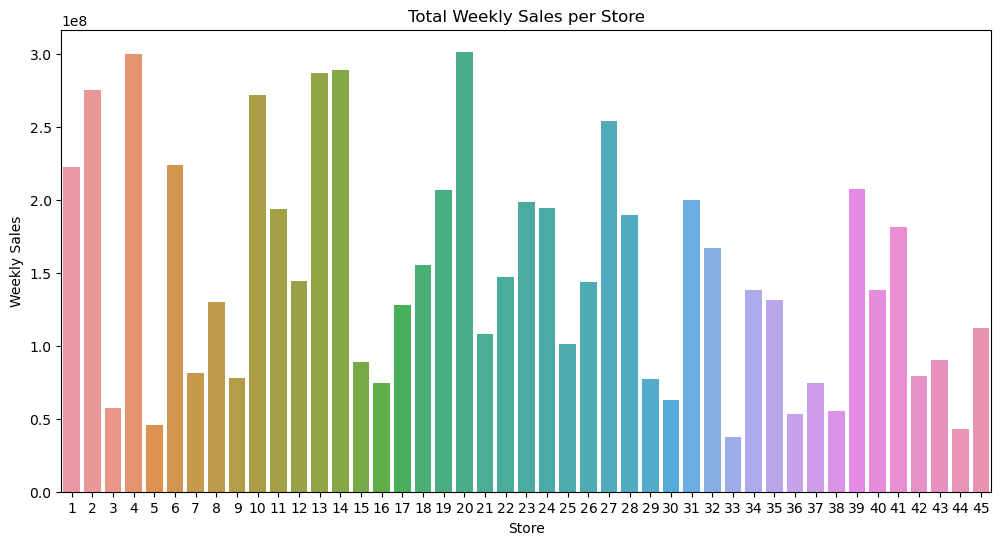

In [22]:
total_sales_per_store = pd.DataFrame(total_sales_per_store)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_per_store.index, y='Weekly_Sales', data=total_sales_per_store)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Total Weekly Sales per Store')
plt.show()

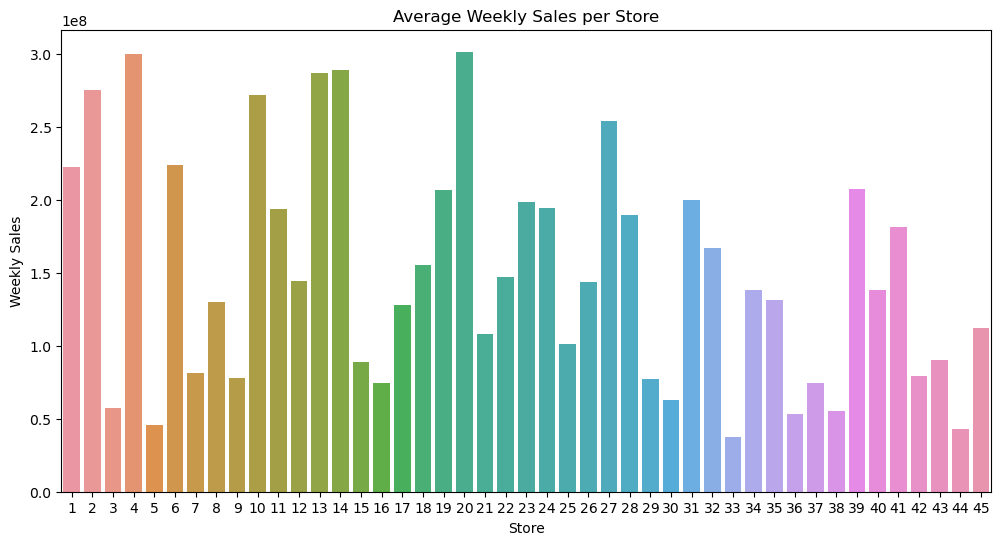

In [23]:
average_sales_per_store = pd.DataFrame(total_sales_per_store)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_per_store.index, y='Weekly_Sales', data=total_sales_per_store)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Average Weekly Sales per Store')
plt.show()

#### Store 22 is the top performing Store 
#### Store 33 is the worst performing Store

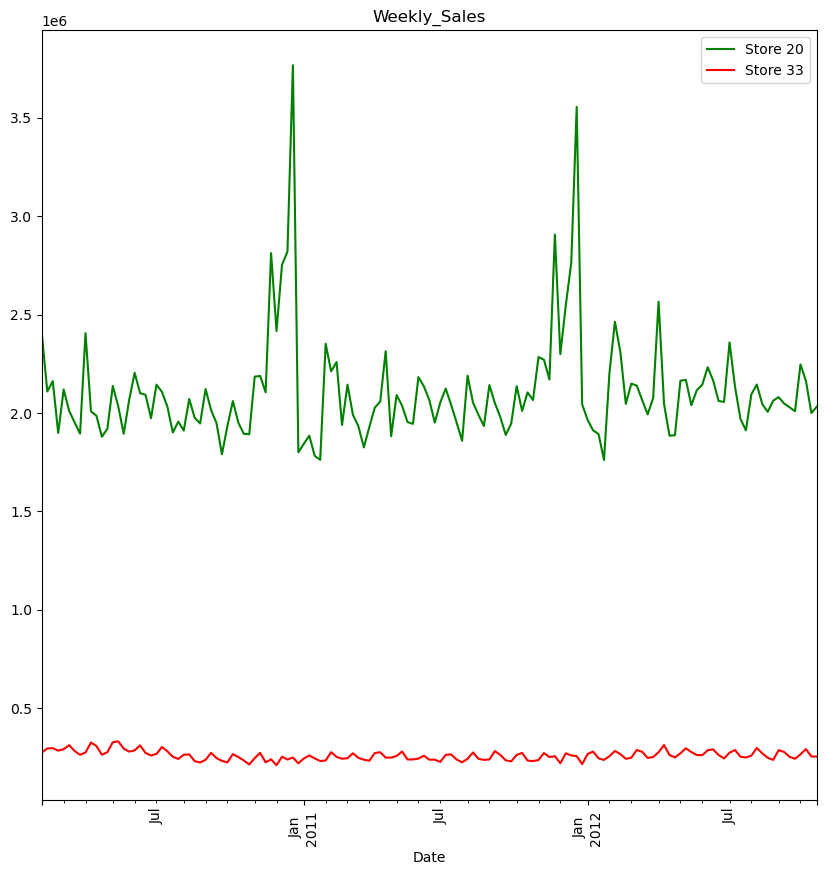

In [24]:
# Plot between top and worst store Weekly_Sales
fig, ax = plt.subplots(figsize=(10, 10))
plot = store_dict[20]['Weekly_Sales'].plot(rot=90, ax=ax, color='green', label='Store 20')
plot = store_dict[33]['Weekly_Sales'].plot(rot=90, ax=ax, color='red', label='Store 33')
plot.set_title("Weekly_Sales".format(col))
ax.legend()
plt.show()

In [120]:
storeId= 1
df = store_dict[storeId]['Weekly_Sales']
df = pd.DataFrame(df)
df

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [26]:
df.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


In [27]:
df.tail()

,Weekly_Sales
Date,
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81
2012-10-19,1508068.77
2012-10-26,1493659.74


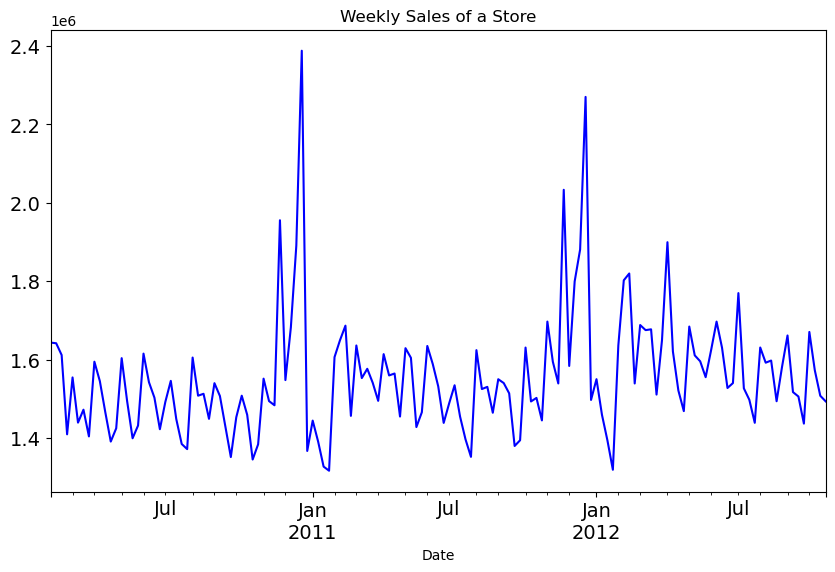

In [28]:
df.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

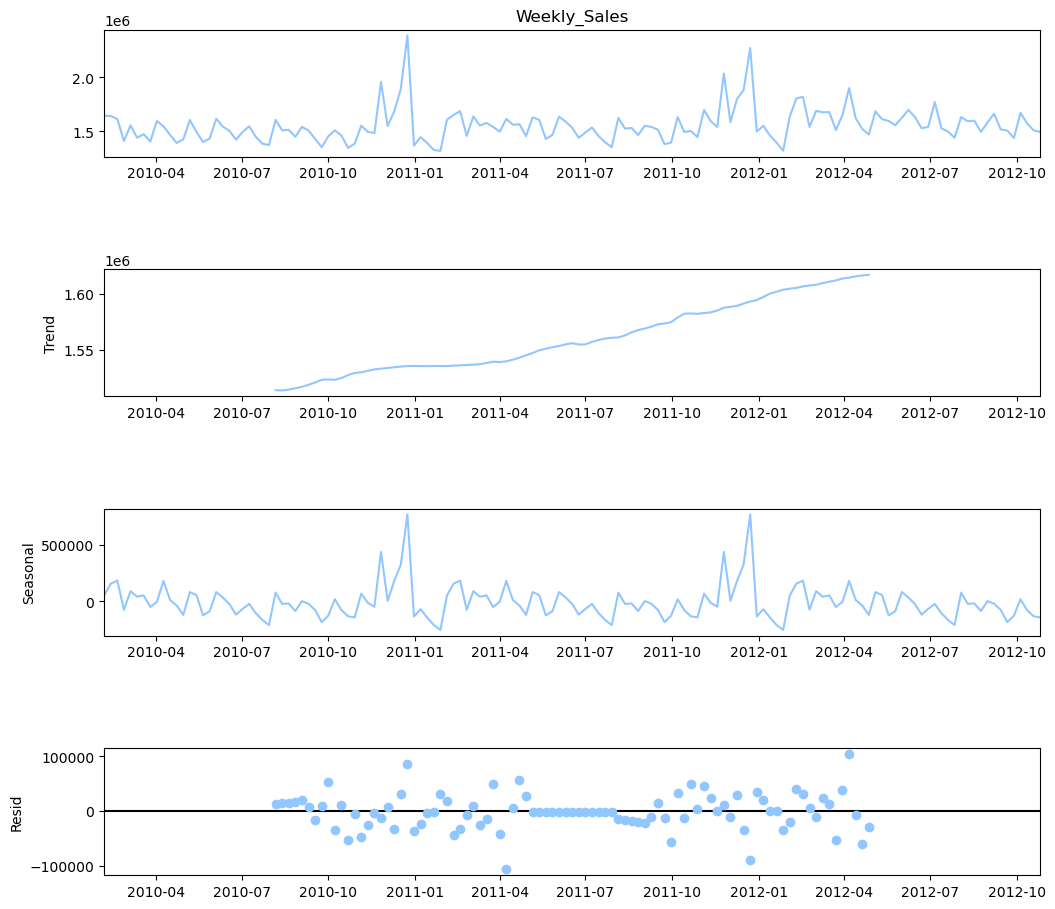

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We have weekly data so we need to provide 52 weeks to provide 1 year as period. 
decomposition = seasonal_decompose(df.Weekly_Sales, period=52)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [121]:
# Here we can see upward trend in weekly sales plot
# We can ovserve clear seasonal plot above we will be needing SARIMAX

In [66]:
from statsmodels.tsa.stattools import adfuller

adfuller_res = adfuller(df)
adfuller_res

(-5.102186145192287,
 1.3877788330759535e-05,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3412.7325502876756)

In [67]:
p_value = adfuller_res[1]
if p_value <0.05:
  print("Stationarity is present")
else:
  print("Stationarity is not present")

Stationarity is present


In [68]:
# The above p_value determines that our model is stationary and we can proceed to create our model

C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


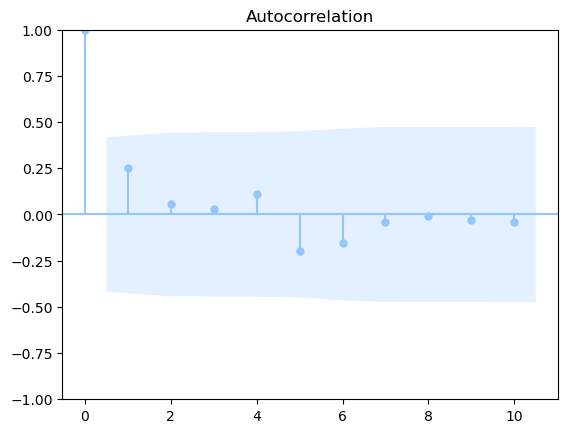

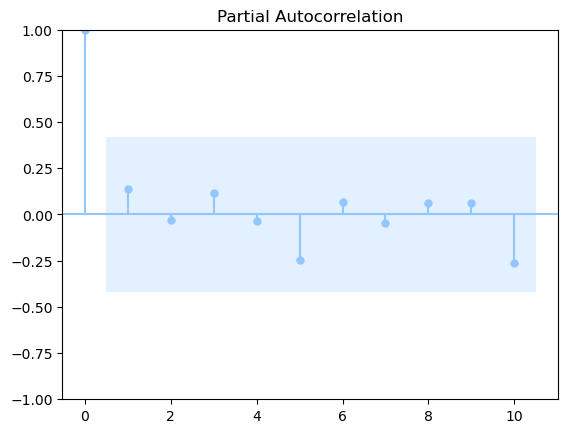

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf

acf_plot = acf(df)
plot_acf(acf_plot,lags=10);

pacf_plot=pacf(df)
plot_pacf(pacf_plot,lags=10);

#### From the above acf and pacf plot we can say that p value can be 1 from pacf curve and q value is 1 from acf curve.

In [70]:
import pmdarima as pm

#### Using auto_arima to determine p,q,d values

In [64]:
model = pm.auto_arima(df, seasonal=True, m=52)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1884.296
Date:                             Sun, 24 Dec 2023   AIC                           3776.592
Time:                                     13:46:15   BIC                           3788.415
Sample:                                 02-05-2010   HQIC                          3781.396
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4168      0.091      4.596      0.000       0.239       0.594
ma.L1         -0.8985      0.048    -18.584      0.000      -0.993      -0.804
ar.S.L52       0.4936      0.038     12.973      0.000       0.419       0.568
sigma2      2.445e+10   3.87e-13   6.32e+22      0.000    2.44e+10    2.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):               155.95
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [71]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['Weekly_Sales'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, [], 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.summary()

C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1884.296
Date:                             Sun, 24 Dec 2023   AIC                           3776.592
Time:                                     13:50:19   BIC                           3788.415
Sample:                                 02-05-2010   HQIC                          3781.396
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4168      0.091      4.597      0.000       0.239       0.594
ma.L1         -0.8985      0.048    -18.590      0.000      -0.993      -0.804
ar.S.L52       0.4936      0.038     12.972      0.000       0.419       0.568
sigma2      2.445e+10   3.86e-13   6.33e+22      0.000    2.44e+10    2.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):               155.94
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.74e+38. Standard errors may be unstable.
"""

C:\Users\sanja\AppData\Local\Temp\ipykernel_22672\3809637464.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


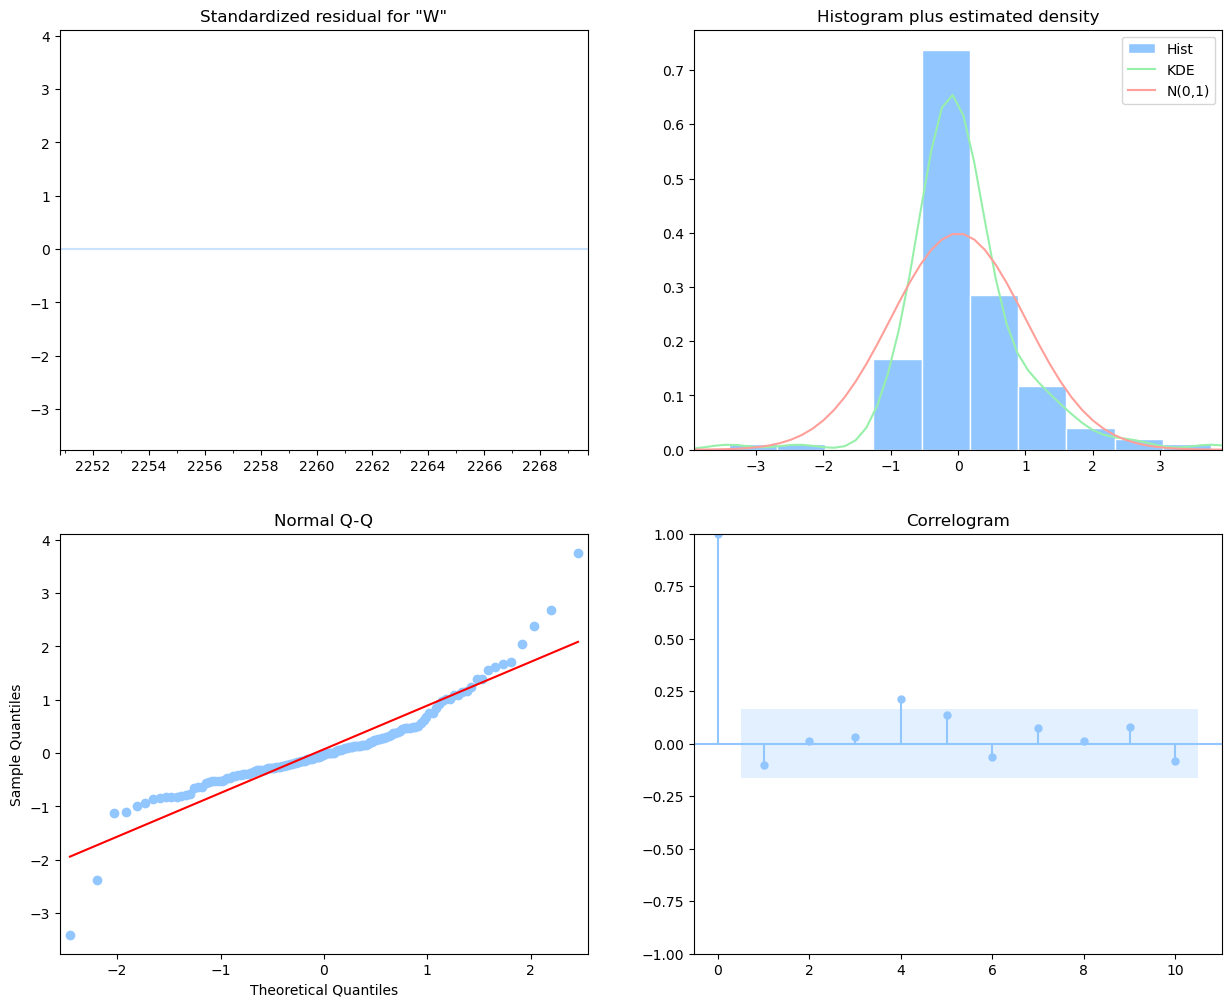

In [72]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [122]:
# Creating the predictions
from datetime import datetime, timedelta

start_date = pd.to_datetime('2012-10-26')

end_date = start_date + timedelta(weeks=12)

pred = results.predict(start=start_date,end=end_date, dynamic=False)
pred

2012-10-26    1.510299e+06
2012-11-02    1.638783e+06
2012-11-09    1.596931e+06
2012-11-16    1.573158e+06
2012-11-23    1.818435e+06
2012-11-30    1.597301e+06
2012-12-07    1.703989e+06
2012-12-14    1.744326e+06
2012-12-21    1.936403e+06
2012-12-28    1.554975e+06
2013-01-04    1.581100e+06
2013-01-11    1.536296e+06
2013-01-18    1.504109e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

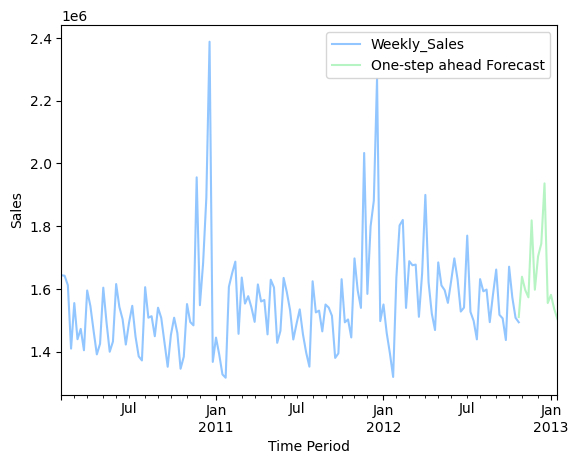

In [76]:
ax = df['2010':].plot(label='observed')
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

#### The green plot shows the next 12 weeks forcast. 

In [119]:
# Lets test our data using last 52 week data and check the model accuracy
test = df.tail(52)

In [111]:
from datetime import datetime, timedelta

start_date = pd.to_datetime('2011-11-04')

end_date = start_date + timedelta(weeks=51)

pred_test = results.predict(start=start_date,end=end_date, dynamic=False)
pred_test

2011-11-04    1.539754e+06
2011-11-11    1.598078e+06
2011-11-18    1.561612e+06
2011-11-25    1.771372e+06
2011-12-02    1.705498e+06
2011-12-09    1.656236e+06
2011-12-16    1.835846e+06
2011-12-23    2.076827e+06
2011-12-30    1.652527e+06
2012-01-06    1.562932e+06
2012-01-13    1.541263e+06
2012-01-20    1.474798e+06
2012-01-27    1.447362e+06
2012-02-03    1.548265e+06
2012-02-10    1.650938e+06
2012-02-17    1.745091e+06
2012-02-24    1.638712e+06
2012-03-02    1.647653e+06
2012-03-09    1.635974e+06
2012-03-16    1.663318e+06
2012-03-23    1.643114e+06
2012-03-30    1.544983e+06
2012-04-06    1.681649e+06
2012-04-13    1.756636e+06
2012-04-20    1.640363e+06
2012-04-27    1.531678e+06
2012-05-04    1.611984e+06
2012-05-11    1.661186e+06
2012-05-18    1.543411e+06
2012-05-25    1.597403e+06
2012-06-01    1.651941e+06
2012-06-08    1.620378e+06
2012-06-15    1.639934e+06
2012-06-22    1.576864e+06
2012-06-29    1.572791e+06
2012-07-06    1.587382e+06
2012-07-13    1.652636e+06
2

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred_test)

mse = mean_squared_error(test, pred_test)

rmse = np.sqrt(mse)

print(f'Mean absolute Error: {mae:.4f}')
print(f'Mean squared Error: {mse:.4f}')
print(f'Root Mean squared Error: {rmse:.4f}')

Mean absolute Error: 77747.7848
Mean squared Error: 9600364442.9141
Root Mean squared Error: 97981.4495


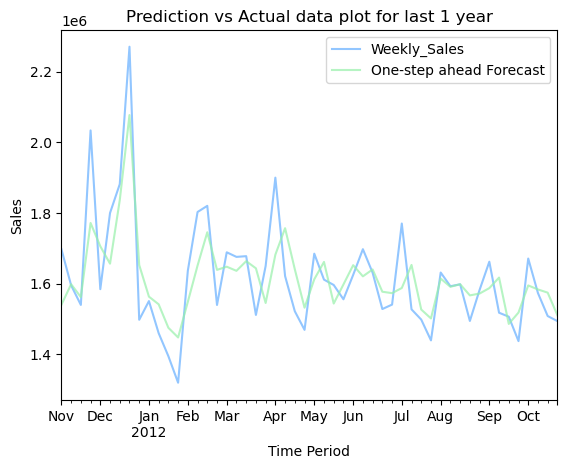

In [118]:
ax = test.plot(label='observed')
pred_test.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.title("Prediction vs Actual data plot for last 1 year")
plt.legend()

plt.show()

### We can repeat the above process to get the prediction for each store. 

In [129]:
# Add the store no you want to analysis
# Follow the bellow steps to get the predicted values for other stores
storeId=int(input("Enter the store id:"))
df = store_dict[storeId]['Weekly_Sales']
df = pd.DataFrame(df)
df

Enter the store id:5


,Weekly_Sales
Date,
2010-02-05,317173.10
2010-02-12,311825.70
2010-02-19,303447.57
2010-02-26,270281.63
2010-03-05,288855.71
...,...
2012-09-28,310141.68
2012-10-05,343048.29
2012-10-12,325345.41


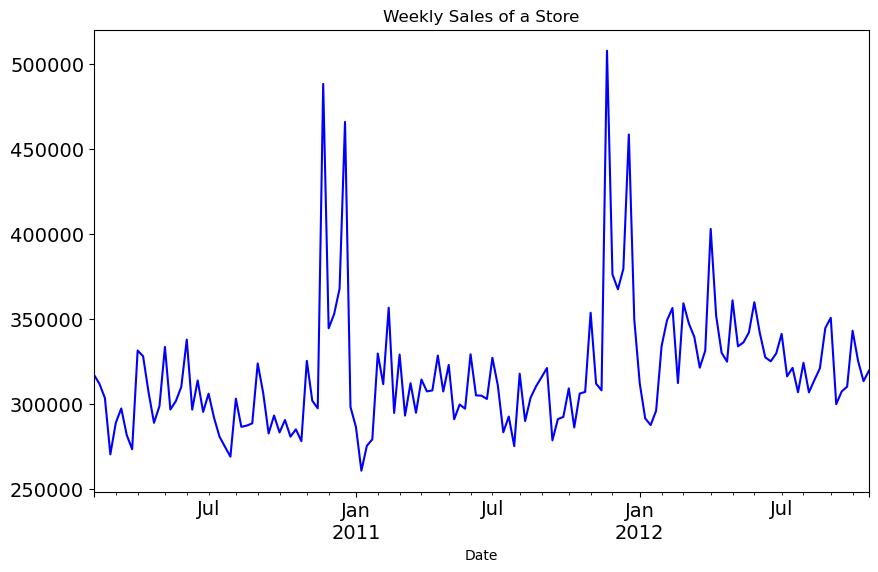

In [130]:
df.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

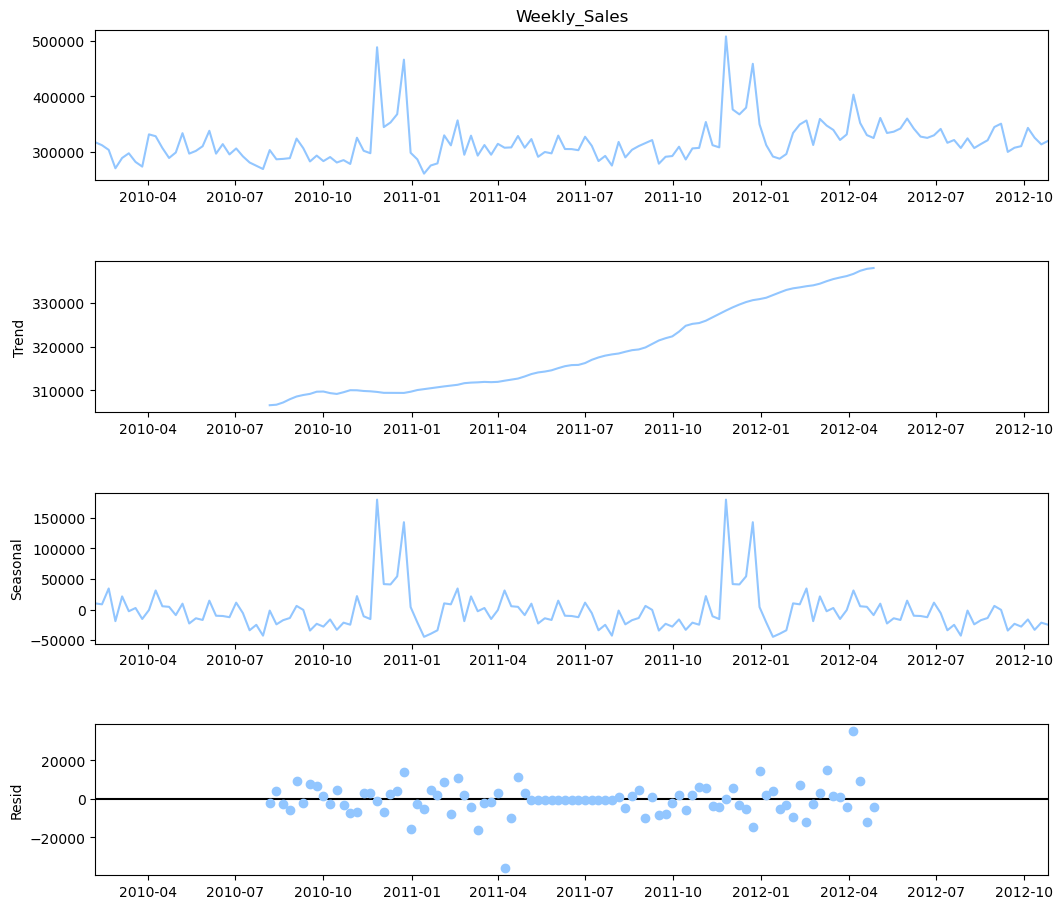

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We have weekly data so we need to provide 52 weeks to provide 1 year as period. 
decomposition = seasonal_decompose(df.Weekly_Sales, period=52)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [132]:
from statsmodels.tsa.stattools import adfuller

adfuller_res = adfuller(df)
adfuller_res

(-4.310974424060913,
 0.00042517056141923467,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3038.49592982281)

In [133]:
p_value = adfuller_res[1]
if p_value <0.05:
  print("Stationarity is present")
else:
  print("Stationarity is not present")

Stationarity is present


C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


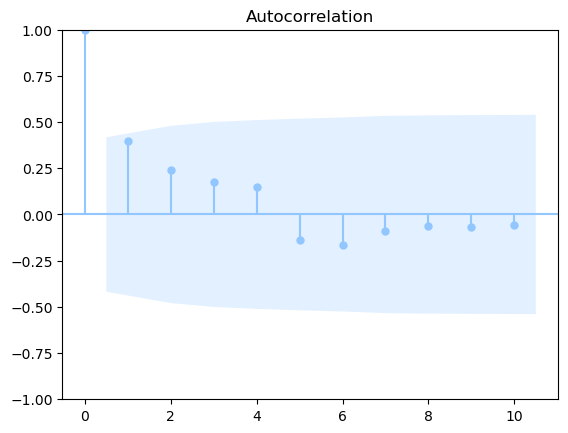

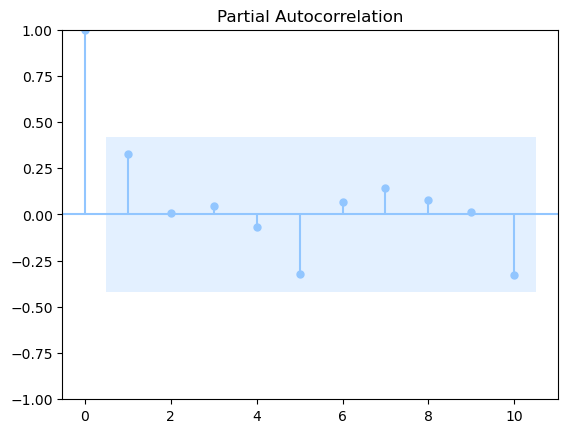

In [134]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf

acf_plot = acf(df)
plot_acf(acf_plot,lags=10);

pacf_plot=pacf(df)
plot_pacf(pacf_plot,lags=10);

In [135]:
import pmdarima as pm

In [136]:
model = pm.auto_arima(df, seasonal=True, m=52)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1673.764
Date:                             Sun, 24 Dec 2023   AIC                           3355.528
Time:                                     19:14:36   BIC                           3367.351
Sample:                                 02-05-2010   HQIC                          3360.333
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3045      0.112      2.729      0.006       0.086       0.523
ma.L1         -0.7598      0.099     -7.689      0.000      -0.953      -0.566
ar.S.L52       0.5216      0.033     15.641      0.000       0.456       0.587
sigma2       1.24e+09   9.54e-12    1.3e+20      0.000    1.24e+09    1.24e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):               443.91
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+36. Standard errors may be unstable.
"""

In [137]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['Weekly_Sales'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, [], 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.summary()

C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1673.764
Date:                             Sun, 24 Dec 2023   AIC                           3355.528
Time:                                     19:37:24   BIC                           3367.351
Sample:                                 02-05-2010   HQIC                          3360.333
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3046      0.112      2.730      0.006       0.086       0.523
ma.L1         -0.7598      0.099     -7.692      0.000      -0.953      -0.566
ar.S.L52       0.5216      0.033     15.640      0.000       0.456       0.587
sigma2       1.24e+09   9.54e-12    1.3e+20      0.000    1.24e+09    1.24e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):               443.92
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+36. Standard errors may be unstable.
"""

C:\Users\sanja\AppData\Local\Temp\ipykernel_22672\3809637464.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


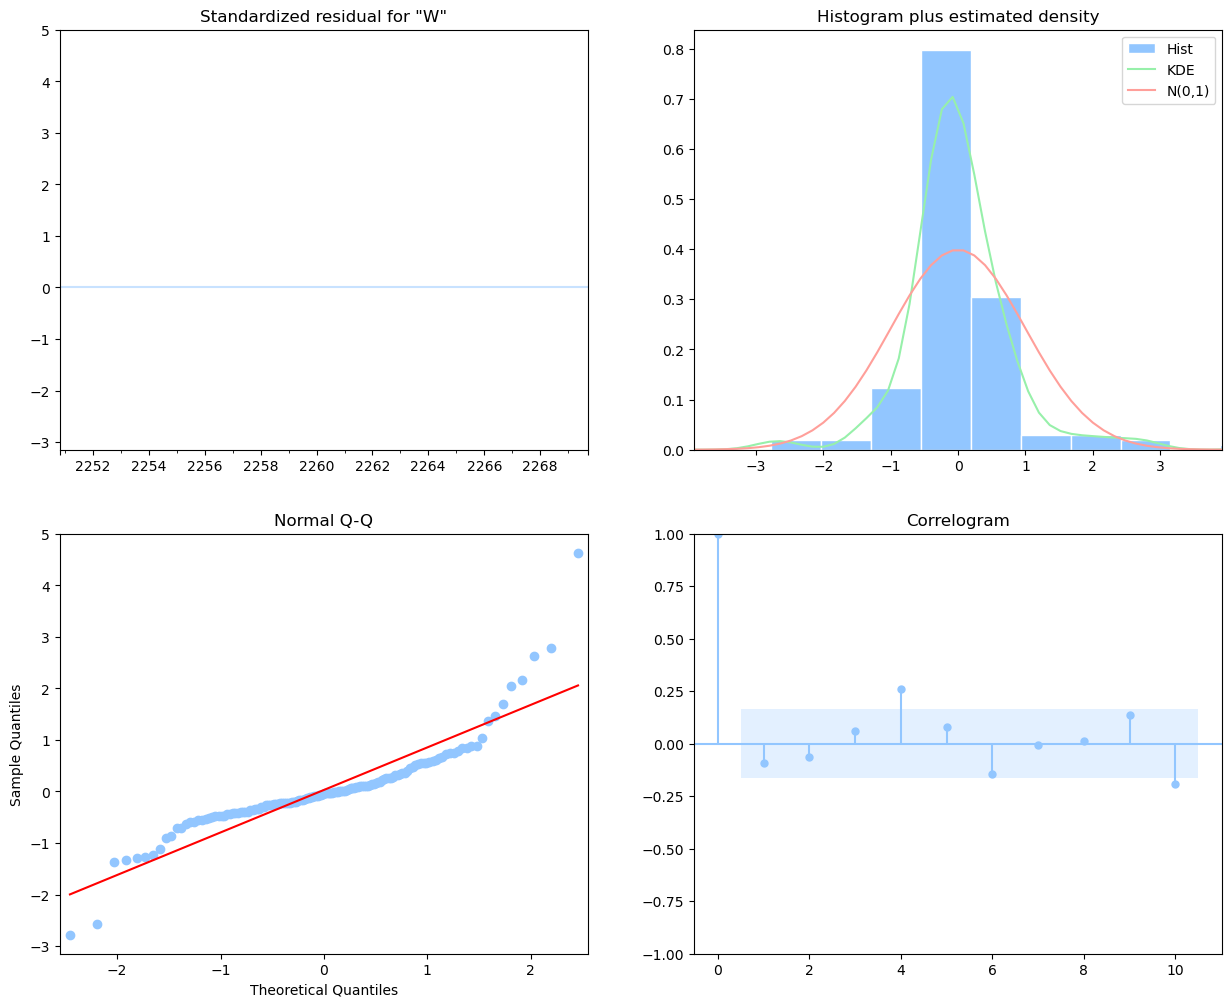

In [138]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [139]:
# Creating the predictions
from datetime import datetime, timedelta

start_date = pd.to_datetime('2012-10-26')

end_date = start_date + timedelta(weeks=12)

pred = results.predict(start=start_date,end=end_date, dynamic=False)
pred

2012-10-26    320893.093674
2012-11-02    346617.716119
2012-11-09    325682.457030
2012-11-16    323871.094072
2012-11-23    428241.284688
2012-11-30    359586.499574
2012-12-07    355008.083403
2012-12-14    361319.560295
2012-12-21    402541.528354
2012-12-28    345722.432100
2013-01-04    326139.248358
2013-01-11    315382.149234
2013-01-18    313332.072892
Freq: W-FRI, Name: predicted_mean, dtype: float64

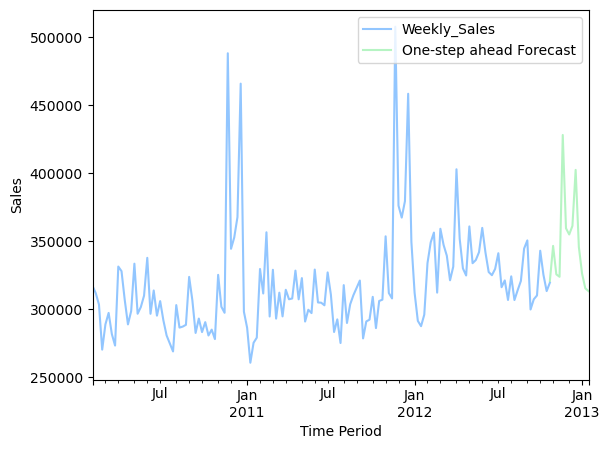

In [140]:
ax = df['2010':].plot(label='observed')
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [141]:
# Lets test our data using last 52 week data and check the model accuracy
test = df.tail(52)

In [142]:
from datetime import datetime, timedelta

start_date = pd.to_datetime('2011-11-04')

end_date = start_date + timedelta(weeks=51)

pred_test = results.predict(start=start_date,end=end_date, dynamic=False)
pred_test

2011-11-04    325702.726621
2011-11-11    326854.148853
2011-11-18    311963.756796
2011-11-25    410107.182510
2011-12-02    389113.339543
2011-12-09    373110.021055
2011-12-16    375565.796967
2011-12-23    429044.519674
2011-12-30    357066.121885
2012-01-06    342589.544646
2012-01-13    312296.896739
2012-01-20    312749.332064
2012-01-27    305131.813417
2012-02-03    331259.034265
2012-02-10    326043.850751
2012-02-17    362622.350309
2012-02-24    323852.047128
2012-03-02    335366.611317
2012-03-09    331198.082840
2012-03-16    347096.403090
2012-03-23    330709.594338
2012-03-30    335925.392995
2012-04-06    331117.270011
2012-04-13    371615.191678
2012-04-20    361886.296313
2012-04-27    333339.445317
2012-05-04    341206.327487
2012-05-11    337778.603957
2012-05-18    338206.844471
2012-05-25    335763.712936
2012-06-01    356127.803441
2012-06-08    344758.728387
2012-06-15    342247.802007
2012-06-22    333337.192577
2012-06-29    343566.876201
2012-07-06    329290

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred_test)

mse = mean_squared_error(test, pred_test)

rmse = np.sqrt(mse)

print(f'Mean absolute Error: {mae:.4f}')
print(f'Mean squared Error: {mse:.4f}')
print(f'Root Mean squared Error: {rmse:.4f}')

Mean absolute Error: 14610.5853
Mean squared Error: 487378229.7163
Root Mean squared Error: 22076.6444


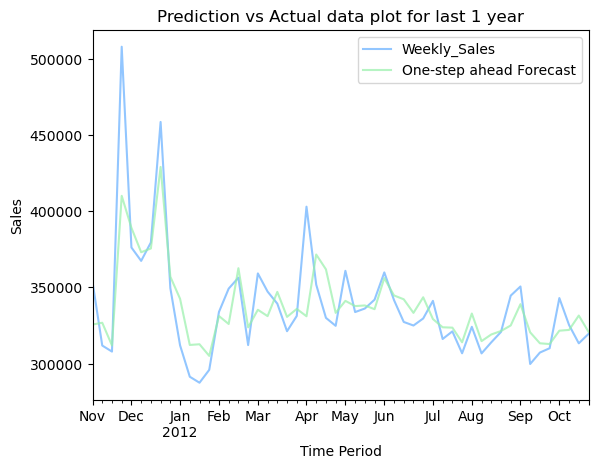

In [144]:
ax = test.plot(label='observed')
pred_test.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.title("Prediction vs Actual data plot for last 1 year")
plt.legend()

plt.show()